The goal of this homework is to create a regression model for predicting housing prices (column 'median_house_value').

In this homework we'll again use the California Housing Prices dataset - the same one we used in homework 2 and 3.

You can take it from Kaggle or download using wget link mentioned below:

wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

Note: sometimes your answer doesn't match one of the options exactly. That's fine. Select the option that's closest to your solution.

In [1]:
!wget "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv" 

--2022-10-17 23:45:28--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8002::154, 2606:50c0:8001::154, 2606:50c0:8003::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8002::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: 'housing.csv'

     0K .......... .......... .......... .......... ..........  3%  680K 2s
    50K .......... .......... .......... .......... ..........  7% 2.30M 1s
   100K .......... .......... .......... .......... .......... 10% 1.25M 1s
   150K .......... .......... .......... .......... .......... 14% 3.84M 1s
   200K .......... .......... .......... .......... .......... 17% 1.13M 1s
   250K .......... .......... .......... .......... .......... 21% 3.73M 1s
   300K .......... .......... .......... .......... .......... 25% 2.55M 1s
   350K ........

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction import DictVectorizer

from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score, mean_squared_error



In [3]:
%matplotlib inline

# Loading the data

In [4]:
data = pd.read_csv("housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
data.shape

(20640, 10)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Use only the following columns:

    'latitude',

    'longitude',

    'housing_median_age',

    'total_rooms',

    'total_bedrooms',

    'population',

    'households',

    'median_income',

    'median_house_value',

    'ocean_proximity'

    

In [7]:
cols = data.columns.values
cols

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'], dtype=object)

#### Fill NAs with 0

In [8]:
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
data.total_bedrooms = data.total_bedrooms.fillna(0)
data.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

#### Apply the log tranform to median_house_value.

In [10]:
data["median_house_value"] = np.log1p(data["median_house_value"])

In [11]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,13.022766,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,12.789687,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,12.771673,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,12.740520,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,12.743154,NEAR BAY


Do train/validation/test split with 60%/20%/20% distribution. 

Use the train_test_split function and set the random_state parameter to 1.

In [12]:
X = data.drop("median_house_value",axis=1)
y = data["median_house_value"]

In [13]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train_full.shape, y_train_full.shape, X_test.shape, y_test.shape 

((16512, 9), (16512,), (4128, 9), (4128,))

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=1)
X_train.shape, y_train.shape, X_val.shape, y_val.shape 

((12384, 9), (12384,), (4128, 9), (4128,))

#### Use DictVectorizer to turn the dataframe into matrices.

In [15]:
from sklearn.feature_extraction import DictVectorizer

In [16]:
x_cols = X.columns.values
 

In [17]:
# DictVectorizer to convert Train, Validation and Test dataframes into matrices
dv = DictVectorizer(sparse=False)

train_dict = X_train[x_cols].to_dict(orient='records')
Xtrain = dv.fit_transform(train_dict)

val_dict = X_val[x_cols].to_dict(orient='records')
Xval = dv.transform(val_dict)

test_dict = X_test[x_cols].to_dict(orient='records')
Xtest = dv.transform(test_dict)

In [18]:
x_cols_dv = list(dv.get_feature_names_out())
x_cols_dv

['households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=<1H OCEAN',
 'ocean_proximity=INLAND',
 'ocean_proximity=ISLAND',
 'ocean_proximity=NEAR BAY',
 'ocean_proximity=NEAR OCEAN',
 'population',
 'total_bedrooms',
 'total_rooms']

Question 1

Let's train a decision tree regressor to predict the median_house_value variable.

    Train a model with max_depth=1.

Which feature is used for splitting the data?

- **ocean_proximity=INLAND**
- total_rooms
- latitude
- population

In [19]:
from sklearn.tree import export_text

In [20]:
# Decision Tree Regression Model
dt_reg = DecisionTreeRegressor(max_depth=1)
model = dt_reg.fit(Xtrain, y_train)

print("Decision Tree:")
print(export_text(model, feature_names = list(dv.get_feature_names_out())))
 

Decision Tree:
|--- ocean_proximity=INLAND <= 0.50
|   |--- value: [12.31]
|--- ocean_proximity=INLAND >  0.50
|   |--- value: [11.61]



Question 2

Train a random forest model with these parameters:

    n_estimators=10
    random_state=1
    n_jobs=-1 (optional - to make training faster)

What's the RMSE of this model on validation?

- 0.05
- **0.25**
- 0.55
- 0.85

In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
estimators = 10

In [23]:
rf_reg = RandomForestRegressor(n_estimators=estimators, random_state=1, n_jobs=-1)
model = rf_reg.fit(Xtrain, y_train)

y_train_pred = model.predict(Xtrain)

print("Random Forest Regressor")
print("Training RMSE: ", np.round(np.sqrt(mean_squared_error(y_train, y_train_pred)),2))

y_val_pred = model.predict(Xval)
print("Validation RMSE: ", np.round(np.sqrt(mean_squared_error(y_val, y_val_pred)),2))

Random Forest Regressor
Training RMSE:  0.11
Validation RMSE:  0.25


Question 3

Now let's experiment with the n_estimators parameter

    Try different values of this parameter from 10 to 200 with step 10.
    Set random_state to 1.
    Evaluate the model on the validation dataset.

After which value of n_estimators does RMSE stop improving?

- 10
- 55
- **75**
- 150

In [24]:
estimators = np.arange(10,210,10)
scores = []

for n in estimators:
    rf_reg = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    
    model = rf_reg.fit(Xtrain, y_train)

    y_train_pred = model.predict(Xtrain)
    
    y_val_pred = model.predict(Xval)
    
    scores.append(np.sqrt(mean_squared_error(y_val, y_val_pred)))

C:\anaconda3\envs\ml-zoomcamp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


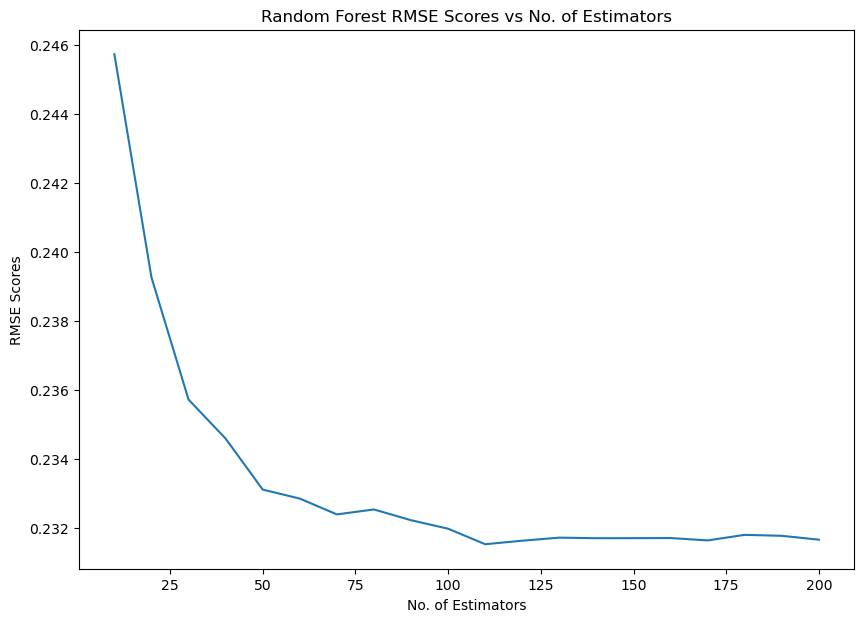

In [25]:
plt.figure(figsize=(10,7))

sns.lineplot(estimators, scores, )
plt.xlabel("No. of Estimators")
plt.ylabel("RMSE Scores")
plt.title("Random Forest RMSE Scores vs No. of Estimators")
plt.show()

In [26]:
estimators[np.argmin(scores)]


110

Question 4

Let's select the best max_depth:

    Try different values of max_depth: [10, 15, 20, 25]
    For each of these values, try different values of n_estimators from 10 till 200 (with step 10)
    Fix the random seed: random_state=1

What's the best max_depth:

- 10
- 15
- 20
- **25**

In [27]:
depths =  [10, 15, 20, 25]
estimators = np.arange(10,210,10)
scores = []

for d in depths:
    for n in estimators:
        rf_reg = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1, max_depth=d)

        model = rf_reg.fit(Xtrain, y_train)

        y_train_pred = model.predict(Xtrain)

        y_val_pred = model.predict(Xval)

        score = np.sqrt(mean_squared_error(y_val, y_val_pred))
        
        scores.append({'max_depth':d,'n_estimators':n,'rmse':score})
    
df_scores = pd.DataFrame(scores)

In [28]:
df_scores

,max_depth,n_estimators,rmse
0,10,10,0.255042
1,10,20,0.252784
2,10,30,0.251647
3,10,40,0.251062
4,10,50,0.250192
...,...,...,...
75,25,160,0.231484
76,25,170,0.231440
77,25,180,0.231598
78,25,190,0.231603


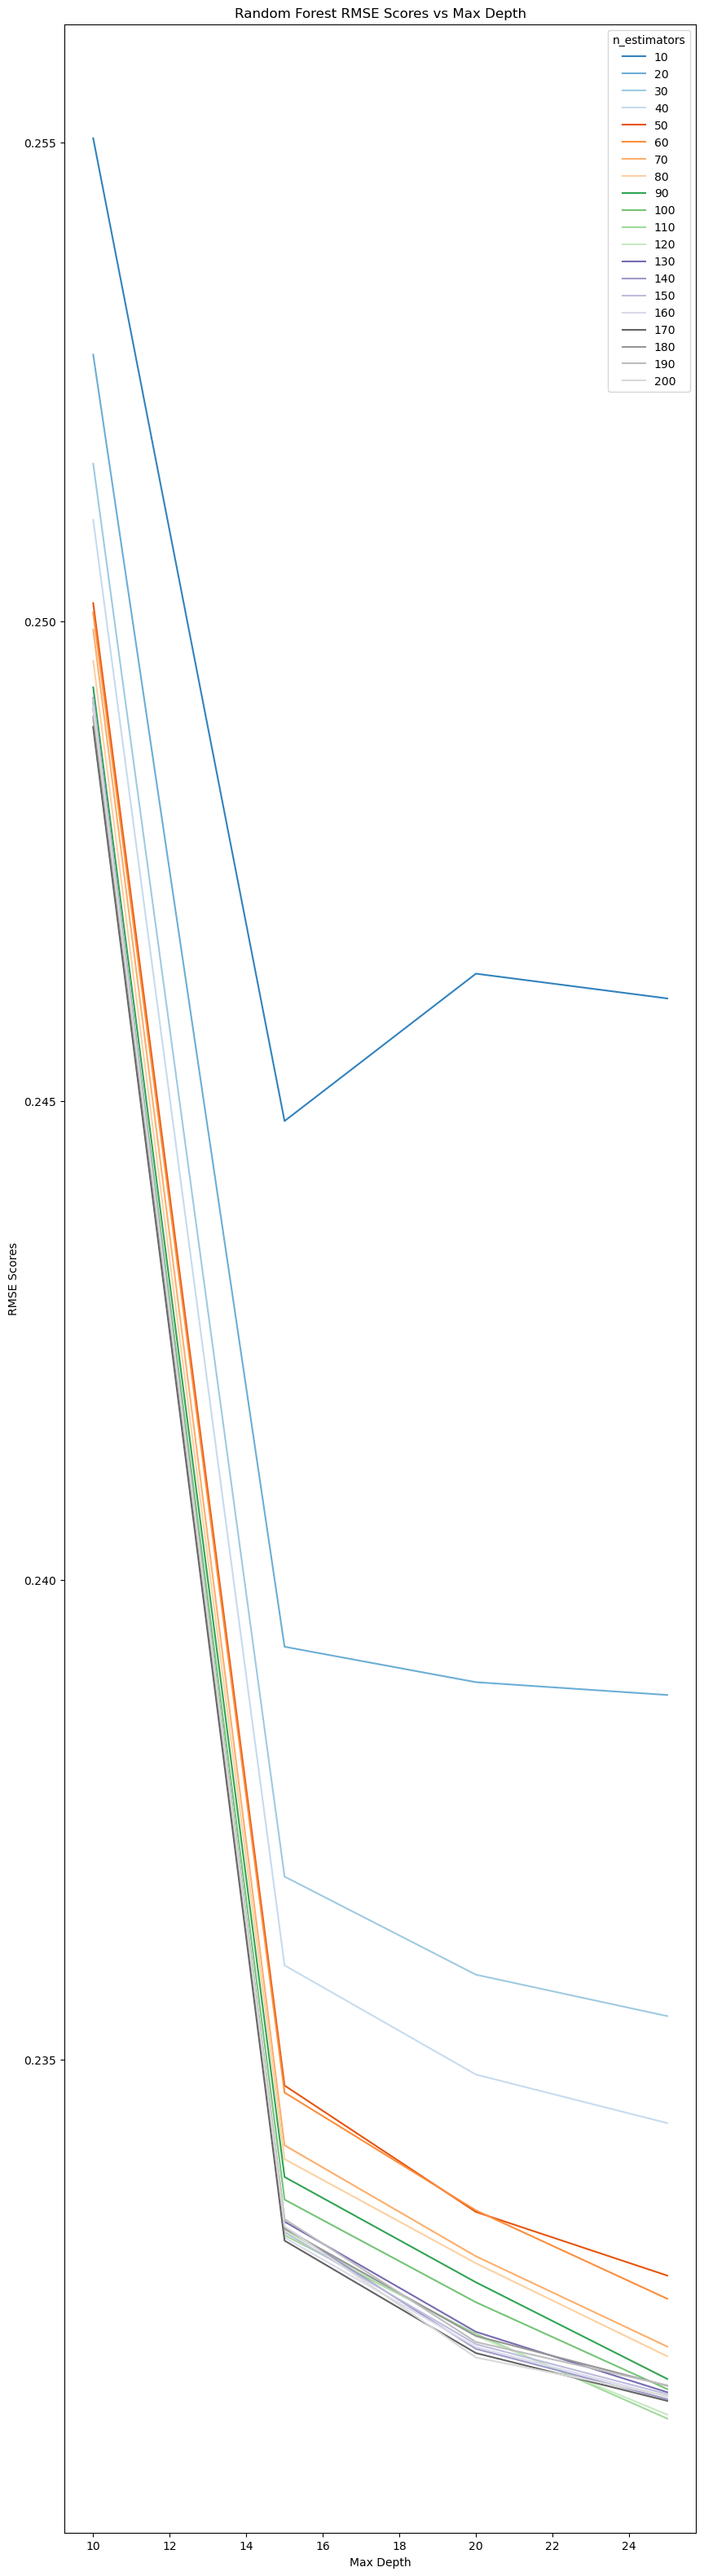

In [29]:
plt.figure(figsize=(10,40))

sns.lineplot(x="max_depth", y="rmse", hue="n_estimators", data=df_scores, palette="tab20c")
plt.xlabel("Max Depth")
plt.ylabel("RMSE Scores")
plt.title("Random Forest RMSE Scores vs Max Depth")
plt.show()

In [30]:
df_scores.min()

max_depth       10.000000
n_estimators    10.000000
rmse             0.231255
dtype: float64

In [31]:
df_scores.loc[df_scores.rmse.argmin()]

max_depth        25.000000
n_estimators    110.000000
rmse              0.231255
Name: 70, dtype: float64

Question 5

We can extract feature importance information from tree-based models.

At each step of the decision tree learning algorith, it finds the best split.
When doint it, we can calculate "gain" - the reduction in impurity before and after the split. 
This gain is quite useful in understanding what are the imporatant features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the feature_importances_ field.

For this homework question, we'll find the most important feature:

    Train the model with these parametes:
        n_estimators=10,
        max_depth=20,
        random_state=1,
        n_jobs=-1 (optional)
    Get the feature importance information from this model

What's the most important feature?

- total_rooms
- **median_income**
- total_bedrooms
- longitude

In [32]:
rf_reg = RandomForestRegressor(max_depth = 20, n_estimators=10,n_jobs=-1,random_state=1)
model = rf_reg.fit(Xtrain,y_train)

importances = pd.Series(model.feature_importances_,index=dv.get_feature_names_out())
importances.sort_values(ascending=False,inplace=True)

C:\anaconda3\envs\ml-zoomcamp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

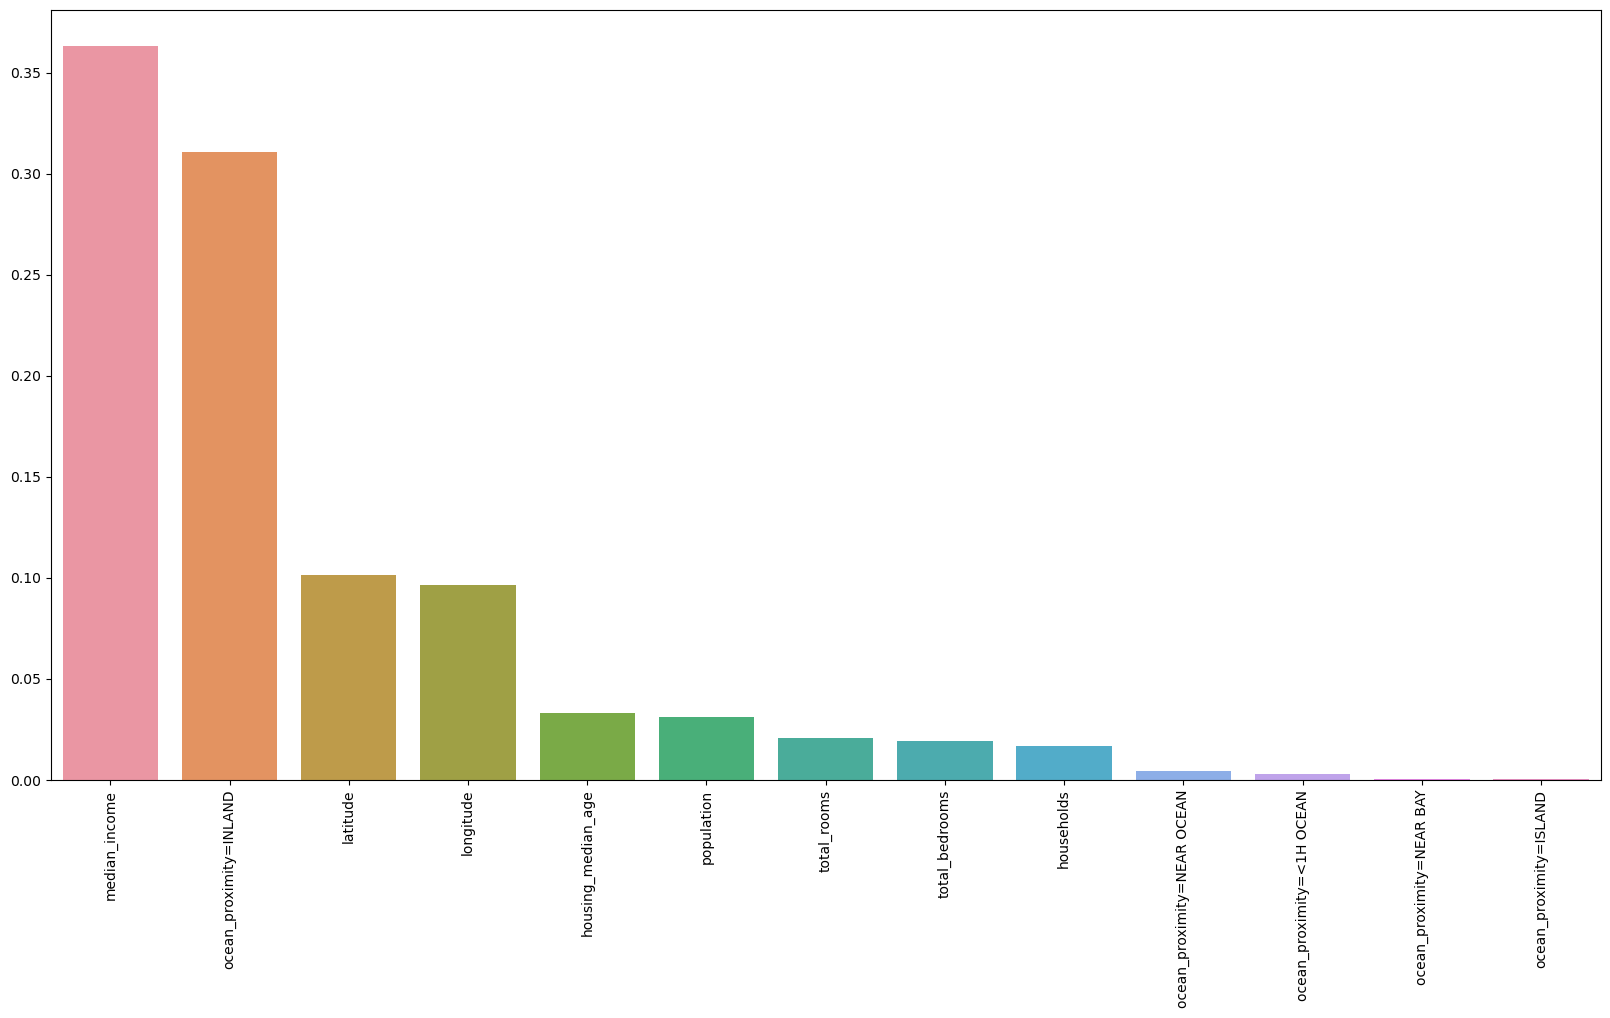

In [33]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.barplot(importances.index, importances.values)

Question 6

Now let's train an XGBoost model! For this question, we'll tune the eta parameter:

    Install XGBoost
    Create DMatrix for train and validation
    Create a watchlist
    Train a model with these parameters for 100 rounds:

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

Now change eta first to 0.1 and then to 0.01

Which eta leads to the best RMSE score on the validation dataset?

- **0.3**
- 0.1
- Both gives same

In [34]:
!pip install xgboost 

In [35]:
import xgboost as xgb

In [36]:
features = list(dv.get_feature_names_out())
features

['households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=<1H OCEAN',
 'ocean_proximity=INLAND',
 'ocean_proximity=ISLAND',
 'ocean_proximity=NEAR BAY',
 'ocean_proximity=NEAR OCEAN',
 'population',
 'total_bedrooms',
 'total_rooms']

In [37]:
features = [feature.replace('<','less') for feature in features]
features

['households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=less1H OCEAN',
 'ocean_proximity=INLAND',
 'ocean_proximity=ISLAND',
 'ocean_proximity=NEAR BAY',
 'ocean_proximity=NEAR OCEAN',
 'population',
 'total_bedrooms',
 'total_rooms']

#### Create DMatrix for train and validation

In [38]:
dtrain = xgb.DMatrix(Xtrain, label=y_train, feature_names=features)
dval = xgb.DMatrix(Xval, label=y_val, feature_names=features)

#### Create a watchlist

In [39]:
watch_list = [(dtrain,'train'),(dval,'val')] 

#### Train model with eta = [0.3,0.1,0.01]

In [40]:
eta_values = [0.3,0.1,0.01]
scores = pd.DataFrame()
for eta in eta_values:
    xgb_params = {
                    'eta': eta, 
                    'max_depth': 6,
                    'min_child_weight': 1,

                    'objective': 'reg:squarederror',
                    'nthread': 8,

                    'seed': 1,
                    'verbosity': 1,
                }

    evals_result = {}
    
    
    model = xgb.train(xgb_params,
                      dtrain=dtrain, 
                      num_boost_round=100, 
                      evals_result=evals_result,
                      verbose_eval=False,
                      evals=watch_list)
    
    df_scores = pd.DataFrame([evals_result['train']['rmse'],evals_result['val']['rmse']]).T
    df_scores.columns = ['train_rmse','val_rmse']
    df_scores['eta'] = eta 
    scores = pd.concat([scores,df_scores])



In [41]:
scores.groupby('eta').val_rmse.describe()

,count,mean,std,min,25%,50%,75%,max
eta,,,,,,,,
0.01,100.0,7.294183,2.102219,4.264961,5.461396,6.996746,8.966232,11.492254
0.10,100.0,1.195462,2.105760,0.230542,0.235186,0.254273,0.826368,10.449375
0.30,100.0,0.480036,1.065971,0.225785,0.227672,0.231148,0.241359,8.132449


In [42]:
scores.head()

,train_rmse,val_rmse,eta
0,8.127330,8.132449,0.3
1,5.695860,5.700702,0.3
2,3.995396,4.000411,0.3
3,2.807121,2.810786,0.3
4,1.978336,1.981749,0.3


In [43]:
scores[["val_rmse", "eta"]].sort_values(by="val_rmse",ascending=True)

,val_rmse,eta
85,0.225785,0.30
86,0.225823,0.30
83,0.225889,0.30
82,0.225949,0.30
84,0.225975,0.30
...,...,...
4,11.040215,0.01
3,11.151528,0.01
2,11.263970,0.01
1,11.377531,0.01


In [44]:
scores.iloc[scores.val_rmse.argmin()]

train_rmse    0.141663
val_rmse      0.225785
eta           0.300000
Name: 85, dtype: float64

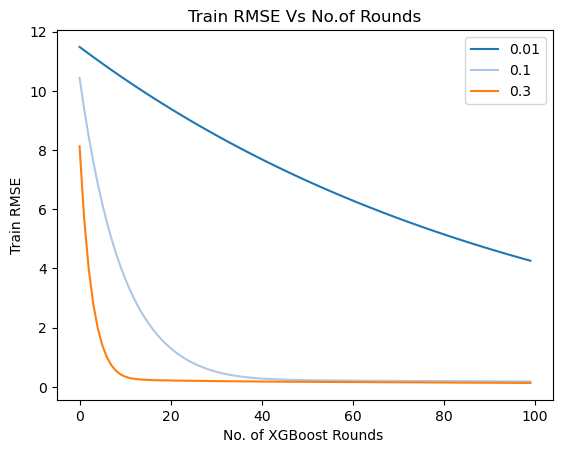

In [45]:
plt.title("Train RMSE Vs No.of Rounds")
plt.xlabel("No. of XGBoost Rounds ")
plt.ylabel("Train RMSE")
sns.lineplot(x=scores.index.values, y=scores.train_rmse.values, data=scores, hue=scores.eta.values, palette='tab20')
plt.show()

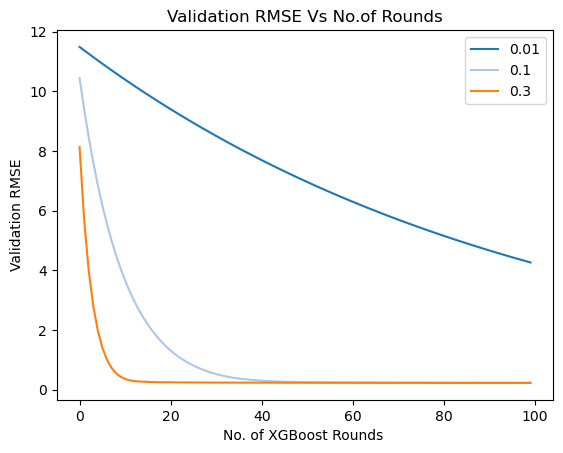

In [46]:
plt.title("Validation RMSE Vs No.of Rounds")
plt.xlabel("No. of XGBoost Rounds ")
plt.ylabel("Validation RMSE")
sns.lineplot(x=scores.index.values ,y=scores.val_rmse.values, hue=scores.eta.values, palette='tab20')
plt.show()